# Centralni limitni izrek

Osnovna verjetnostna porazdelitev za naključni izmerek sinusne napetosti $U=U_0\sin(\omega t)$ je
$$\frac{dP}{dU}=\frac{1}{\pi\sqrt{U_0^2-U^2}},$$

## Naloga

Empirično pokaži, da velja centralni limitni izrek. 

## Rešitev

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definicija funkcij
dP_dU = lambda U, U0=1: 1/(np.pi*np.sqrt(U0**2 - U**2))
gauss = lambda x, u, s: 1/np.sqrt(2*np.pi*s**2)*np.exp(-(x-u)**2/2/s**2)

# Definicijsko območje
U = np.linspace(-0.99,0.99,100)

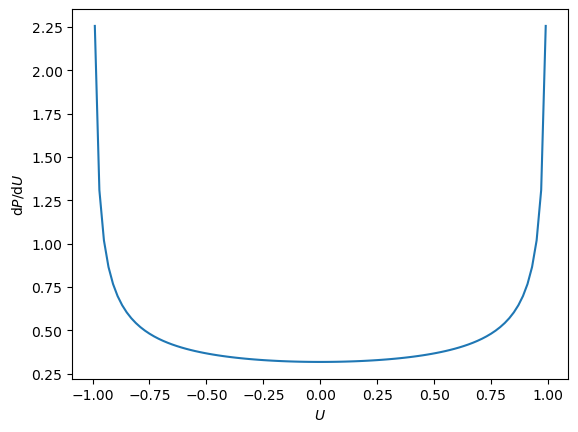

In [2]:
# Izris definirane porazdelitve
fig, ax = plt.subplots()
ax.plot(U, dP_dU(U))
ax.set_xlabel("$U$")
ax.set_ylabel("d$P$/d$U$")
v0 = np.var(U)

plt.show()

In [3]:
# Definicija števila vzorcev
number_sample = (1, 2, 3, 5, 10, 100)
# Definicija slovarja. Ključi so število povprečenih vzorcev, vrednosti pa prazni nizi
random_sample = {s: [] for s in number_sample}

# Iteriramo po številu povprečenih vzorcev
for s in random_sample:
    # Iteriramo po številu vzorčenj
    for i in range(1000):
        # Iz zgoraj definirane porazdelitve izberemo "s" vzorcev
        nakljucni_vzorec = np.random.choice(U, s, p=dP_dU(U)/np.sum(dP_dU(U)))
        # Povprečimo naključni vzorec
        povprecje = np.mean(nakljucni_vzorec)
        # Dodamo povprečen naključni vzorec v slovar
        random_sample[s].append(povprecje)

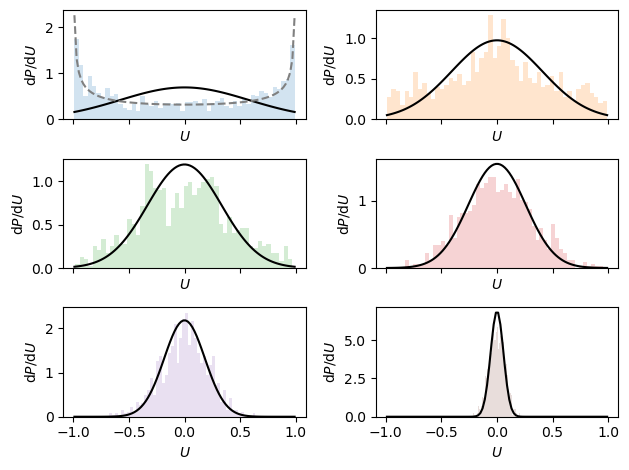

In [4]:
# Izris grafov
fig, ax = plt.subplots(3,2, tight_layout=True, sharex=True)
for i in range(3):
    for j in range(2):
        index = i*2+j
        s = number_sample[index]
        ax[i,j].plot(U, gauss(U, 0, np.sqrt(v0/s)), "k")
        ax[i,j].hist(random_sample[s], density=True, bins=50, color=f'C{index}', alpha=0.2)
        ax[i,j].set_xlabel("$U$")
        ax[i,j].set_ylabel("d$P/$d$U$")
                     
ax[0,0].plot(U, dP_dU(U), "grey", ls="--")

plt.show()

# Določanje agonizma v farmakološkem poskusu

V farmakološkem eksperimentu želimo določiti parametre odnosa med koncentracijo agonista (spojine, ki se selektivno veže na specifične receptorje in sproži biološki odziv v celici) in njegovim učinkom. Merimo kontrakcijo terminalnega dela vitega črevesa podgane pri dodajanju različnih koncentracij učinkovine acetilholin (AcH). Stena tankega črevesa namreč vsebuje gladke mišice, ki se krčijo pod vplivom živčnega signala. Na stiku živčega in gladkomišičnega vlakna se izloči živčni prenašalec AcH, ki se veže na muskarinski receptor na gladkomišičnem vlaknu in izzove kontrakcijo. Učinek (kontrakcija) $E$ je podan z enačbo:

$$
E=E_{m}\frac{[A]}{[A]+EC_{50}}
$$

kjer $E_{m}$ določa učinkovitost (maksimalni učinek) agonista, $EC_{50}$ določa moč agonista, $[A]$ pa je koncentracija agonista. Učinek merimo v dolžini kontrakcije (mm). Zgornjo enačbo lineariziramo, s čimer dobimo Lineweaver-Burkov zapis

$$
\frac{1}{E}=\frac{1}{[A]}\cdot\frac{EC_{50}}{E_m}+\frac{1}{E_m}
$$

## Naloga

Merili smo kontrakcijo v odvisnosti od koncentracije AcH:

| Koncentracija AcH (nM) | Kontrakcija (mm) |
|------------------------|------------------|
| 10                     |6                 |
| 20                     |20                |
| 50                     |26                |
| 100                    |43                |
| 200                    |70                |
| 500                    |89                |
| 1000                   |87                |
| 2000                   |90                |
| 5000                   |92                |


Imamo tudi neznano koncentracijo AcH, pri kateri je bila kontrakcija 22 mm. Ko smo aplicirali 2-krat povišano količino (koncentracijo), je bila kontrakcija 52 mm, ko smo jo zvišali 5-krat, pa je bila kontrakcija 70 mm.

Napaka vseh meritev kontrakcije je $\pm 2$ mm, napaka meritve koncentracije AcH pa je zanemarljiva.

1. Nariši graf odvisnosti kontrakcije od koncentracije AcH v normalni in semi-logaritemski skali (x os naj bo logaritmirana).
2. Prilagodi (curve-fit) meritve zgornji enačbi in določi učinkovitost in moč agonista.
3. Nariši Lineweaver-Burkov graf in z linearno regresijo določi učinkovitost in moč agonista. Ne pozabi na merske napake, ki jih je v tem primeru treba izračunati za vsako meritev.
4. S pomočjo dobljene funkcije določi neznano koncentracijo AcH. Za določanje uporabi metodo najmanjših kvadratov.

## Rešitev

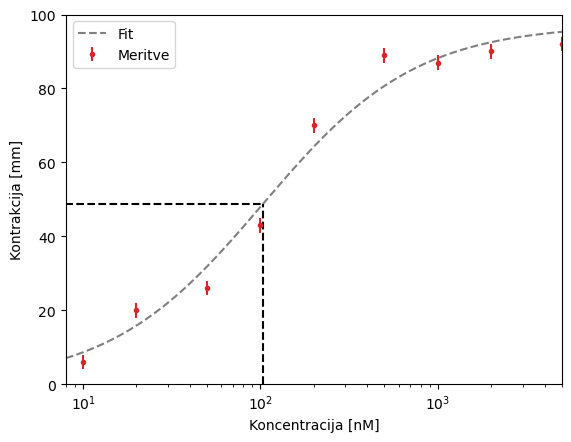

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definicija vrednosti iz tabele
x = np.linspace(8, 5000, 10000, endpoint=True)
koncentracija = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
kontrakcija = np.array([6, 20, 26, 43, 70, 89, 87, 90, 92])
napake = np.array([2 for i in kontrakcija])

# Graf odvisnosti kontrakcije od koncentracije AcH v semi-logaritemski skali
fig, ax = plt.subplots()
ax.errorbar(koncentracija, kontrakcija, napake, color="C3", fmt = '.', label="Meritve")

# Funkcija učinka od koncentracije agonista
E = lambda A, Emax, EC50: Emax*A/(A+EC50)

# Izračun koeficientov fitane krivulje
popt, pcov = curve_fit(E, koncentracija, kontrakcija, sigma=napake)

# Fitana krivulja
ax.semilogx(x, E(x,*popt), c="grey", ls="--", label="Fit")

# Oznake na grafu
ax.legend()
ax.set_xlabel("Koncentracija [nM]")
ax.set_ylabel("Kontrakcija [mm]")

# Črte za oznako EC50
ax.vlines(popt[1], ymin=0, ymax=popt[0]/2, color="k", ls="--")
ax.hlines(popt[0]/2, xmin=0, xmax=popt[1], color="k", ls="--")

# x in y območje
ax.set_ylim(0,100)
ax.set_xlim(8,5000)

plt.show()

Text(0, 0.5, '(Kontrakcija)$^{-1}$ (1/mm)')

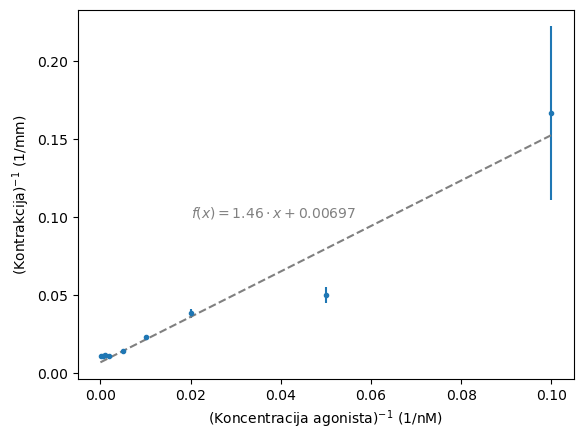

In [6]:
# Definicija premice po metodi najmanjših kvadratov
z = np.polyfit(1/koncentracija, 1/kontrakcija, 1)
f = np.poly1d(z)
x = [0,0.10]

# Izračun napak
napake2 = napake/(kontrakcija**2)

fig, ax = plt.subplots()
ax.errorbar(1/koncentracija, 1/kontrakcija, napake2, fmt=".")
ax.plot(x, f(x), c="grey", ls="--")
ax.text(0.02, 0.1, f'$f(x)={z[0]:.2f}\\cdot x+{z[1]:.5f}$', color="grey")
ax.set_xlabel("(Koncentracija agonista)$^{-1}$ (1/nM)")
ax.set_ylabel("(Kontrakcija)$^{-1}$ (1/mm)")

In [7]:
Em = 1/z[1]
print(f"Učinkovistost: Em = {Em:.2f} mm")
EC50 = z[0]*Em
print(f"Moč agonista: EC50 = {EC50:.2f} nm")

Učinkovistost: Em = 143.52 mm
Moč agonista: EC50 = 208.90 nm


# Določanje antagonizma v farmakološkem poskusu

Antagonist je v farmakologiji eksogena molekula, ki se specifično veže na nek receptor in prepreči delovanje endogeno prisotne snovi, zlasti hormona ali živčnega prenašalca, ki se veže sicer na ta receptor. Ločimo kompetitivne (tekmujejo za isto vezavno mesto kot agonist) in nekompetitivne (vežejo se na drugo vezavno mesto) antagoniste. Kompetitivni antagonist muskarinskih receptorjev je atropin, ki se uporablja kot protistrup pri zastrupitvah z inhibitorji acetilholinesteraz).

Za kompetitivne antagoniste je značilno, da zmanjšajo moč agonistov (zvišajo $EC_{50}$). Razmerje med $A'$ ($EC_{50}$ agonista ob prisotnosti antagonista) in $A$ ($EC_{50}$ agonista) označujemo z $DR$ ("dose ratio"). Velja

$$
DR-1=\frac{[B]}{K_B}
$$

kjer je $[B]$ koncentracija antagonista, $K_B$ pa disociacijska konstanta kompleksa antagonist receptor. $pA_2=-\log K_B$ je mera za učinkovitost antagonista.

## Naloga

Merili smo kontrakcijo v odvisnosti od koncentracije AcH. Poskus smo ponovili pri različnih koncentracijah atropina.

| Koncentracija AcH (nM) | Kontrakcija (mm) | Atropin ($10^{-7}$ M) | Atropin ($10^{-6}$ M) | Atropin ($10^{-5}$ M) | Atropin ($10^{-4}$ M) |
|------------------------|----------|---------------|---------------|---------------|---------------|
| 10                     |3         |0              |0              |0              |0              |
| 29                     |5         |1              |0              |0              |0              |
| 74                     |19        |6              |0              |0              |0              |
| 165                    |37        |16             |2              |0              |0              |
| 342                    |51        |35             |3              |0              |0              |
| 759                    |55        |48             |7              |2              |0              |
| 1607                   |58        |52             |18             |5              |0              |
| 3261                   |62        |55             |32             |6              |3              |
| 7161                   |64        |60             |40             |8              |5              |
| 15104                  |68        |63             |47             |17             |6              |
| 30614                  |70        |66             |52             |33             |7              |
| 67333                  |70        |68             |55             |45             |10             |
| 142015                 |          |70             |57             |51             |22             |
| 288059                 |          |70             |60             |55             |55             |
| 634914                 |          |70             |61             |62             |57             |
| 1339631                |          |               |61             |64             |60             |

1. Nariši graf odvisnosti kontrakcije od koncentracije AcH pri kontroli (brez atropina) in pri različnih koncentracijah atropina v semi-logaritemski skali.
2. Prilagodi kontrolne meritve funkciji učinkovitosti v odvisnosti od koncentracije agonista. Določi učinkovitost in moč AcH. Nato prilagodi funkcijo (učinkovitost naj bo fiksirana) meritvam z antagonistom in določi $EC_{50}$ za posamezne koncentracije atropina.
3. Izračunaj razmerja $DR$ za posamezne koncentracije antagonista in z linearno regresijo določi $pA_2$.